In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 9.6.1 Support Vector Classifier

Original R code:
```r
set.seed (1)
x <- matrix(rnorm (20 * 2), ncol = 2)
y <- c(rep(-1, 10), rep(1, 10))
x[y == 1, ] <- x[y == 1, ] + 1
plot(x, col = (3 - y))
dat <- data.frame(x = x, y = as.factor(y))
```

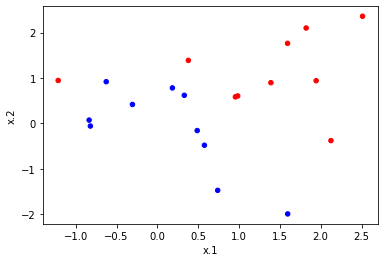

In [2]:
# extracted using r code above into csv file
# df = pd.read_csv('/kaggle/input/islr-v2/9_6_1_svm.csv')
df = pd.read_csv('../data/9_6_1_svm.csv')
df['color'] = df['y']
df['color'] = df['color'].replace(1, 'red')
df['color'] = df['color'].replace(-1, 'blue')
# note: you can chain plots with ax=ax after doing this
ax = df.plot(kind='scatter', x='x.1', y='x.2', c=df['color'])

```r
library(e1071)
svmfit <- svm(y ∼ ., data = dat , kernel = "linear", cost = 10, scale = FALSE)
```

In [3]:
from sklearn.svm import SVC
# TODO: find out how to implement cost=10 and scale=FALSE pieces
model = SVC(kernel='linear')
# reshape data and train - note flipping x columns to match r code output
X = df[['x.2', 'x.1']].values  # .values.reshape(-1, 1)
y = df['y'].values  #.reshape(-1, 1)
model.fit(X, y)
df['y_pred'] = model.predict(X)
df.head()

,x.1,x.2,y,color,y_pred
0,-0.626454,0.918977,-1,blue,-1
1,0.183643,0.782136,-1,blue,1
2,-0.835629,0.074565,-1,blue,-1
3,1.595281,-1.989352,-1,blue,-1
4,0.329508,0.619826,-1,blue,1


```r
plot(svmfit , dat)
```

A helpful resource: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

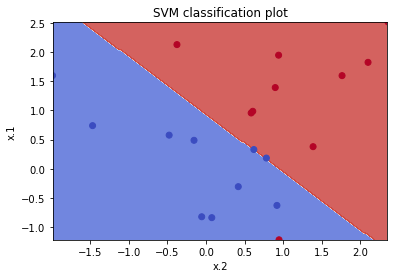

In [5]:
# TODO: figure out how to approximate the r graph generated
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x.2')
plt.ylabel('x.1')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())
plt.title('SVM classification plot');